<a href="https://colab.research.google.com/github/toresh-06/GitActions1/blob/main/advance_machine_learning_loan_approval_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Day 3**



### Dataset Basics: Creating a Sample Dataset

Let's create a small dataset using `pandas`, which is a popular library for data manipulation in Python. This will represent your 'Study Hours', 'Attendance', and 'Marks' example.

### Supervised Learning: Features (X) and Target (Y)

In supervised learning, we distinguish between **features (X)**, which are the input variables, and the **target (Y)**, which is the output variable we want to predict.

From our dataset:
*   **Features (X)**: 'Study Hours', 'Attendance'
*   **Target (Y)**: 'Marks'

### Unsupervised Learning: Grouping

While our dataset is small for a robust unsupervised learning example, conceptually, if we didn't have 'Marks' and only 'Study Hours' and 'Attendance', we might try to group students with similar study habits. This is often done using techniques like clustering.

### Train-Test Split

To evaluate how well our model performs on unseen data, we split our dataset into a **training set** (for the model to learn from) and a **test set** (for evaluating the model).

If test data is inadvertently used during training, it leads to **Data Leakage**, which makes the model appear better than it truly is.

### Classification vs. Regression (numerical)

These are two primary types of supervised learning tasks:

*   **Regression**: Predicts a continuous numerical output.
    *   *Example*: Predicting 'Marks' (a number between 0 and 100) based on study hours and attendance.

*   **Classification**: Predicts a categorical output (a class or label).
    *   *Example*: Predicting if a student will 'Pass' or 'Fail' based on their marks (if marks > 50 is Pass, else Fail).

Let's create a 'Pass/Fail' target for classification from our 'Marks'.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving loan_approval_dataset.csv to loan_approval_dataset.csv


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

### `df.head()`

To view the first few rows of your DataFrame, use the `.head()` method. This is great for a quick preview of your data.

In [ ]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### `df.shape`

The `.shape` attribute returns a tuple representing the dimensions of the DataFrame, where the first value is the number of rows and the second is the number of columns.

In [ ]:
df.shape

(4269, 13)

### `df.info()`

The `.info()` method provides a concise summary of a DataFrame. It's crucial for understanding the data types of each column and checking for non-null values, which helps in identifying potential missing data issues and confirming data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


### `df.size`

The `.size` attribute returns the total number of cells in the DataFrame (rows * columns).

In [ ]:
df.size

55497

### `df.describe()`

The `.describe()` method provides a quick summary of the central tendency, dispersion, and shape of the distribution of numerical columns, excluding NaN values.

In [ ]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
#x--> column
#y--> row
#In this x is predict and y is the data after we remove the target to avoid data leakage
x=df.drop('loan_status',axis=1)
y=df['loan_status']
print(x.columns)

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')


# **Day 4**



### Machine Learning Workflow

The typical machine learning workflow involves several key stages, from data preparation to model deployment. This structured approach helps in building robust and effective models.

Here’s a breakdown of the common steps:

1.  **Data Collection/Acquisition**: Gathering relevant data from various sources.
2.  **Data Preprocessing**: Cleaning, transforming, and preparing the raw data for analysis. This includes handling missing values, encoding categorical variables, scaling numerical features, etc.
3.  **Exploratory Data Analysis (EDA)**: Understanding the dataset's characteristics, identifying patterns, anomalies, and relationships using statistical methods and visualizations.
4.  **Feature Engineering**: Creating new features or modifying existing ones to improve model performance.
5.  **Model Selection**: Choosing an appropriate machine learning algorithm based on the problem type (e.g., classification, regression) and data characteristics.
6.  **Model Training**: Feeding the preprocessed data to the chosen algorithm to learn patterns and relationships.
7.  **Model Evaluation**: Assessing the model's performance on unseen data using various metrics (e.g., accuracy, precision, recall, F1-score for classification; R-squared, MSE for regression).
8.  **Hyperparameter Tuning**: Optimizing the model's hyperparameters to improve its performance.
9.  **Deployment**: Integrating the trained model into a production environment where it can make predictions on new, real-world data.
10. **Monitoring and Maintenance**: Continuously monitoring the model's performance in production and retraining it as needed to adapt to changing data patterns.

Here's a simple diagram illustrating this flow:

```mermaid
graph TD
    A[Data Collection/Acquisition] --> B{Data Preprocessing}
    B --> C[Exploratory Data Analysis (EDA)]
    C --> D[Feature Engineering]
    D --> E[Model Selection]
    E --> F[Model Training]
    F --> G[Model Evaluation]
    G --> H{Hyperparameter Tuning}
    H -- Iterate --> F
    H --> I[Deployment]
    I --> J[Monitoring & Maintenance]
```

### Explaining Your Machine Learning Flow (Simple Words)

Let's break down the machine learning workflow you've outlined in easy terms:

1.  **Problem/Model Framing**: This is like deciding *what question you want to answer* with your data. Is it predicting a number (like prices)? Or is it sorting things into groups (like 'yes' or 'no')? You also decide what 'success' means for your answer.

2.  **Feature Understanding**: This means *getting to know your data*. You look at each piece of information (called a 'feature' or column) to see what it means, what kind of values it has, if there are any missing bits, and how it might be related to what you want to predict.

3.  **Feature Target Separation**: For prediction tasks, you need to *separate your data into two piles*: one pile has all the information your model will 'learn' from (these are your 'features'), and the other pile has the 'answer' you want to predict (this is your 'target').

4.  **Train-Test Split**: To make sure your model isn't just memorizing answers, you *split your data into two parts*: a 'training' part for the model to learn from, and a 'test' part to see how well it performs on new, unseen questions. It's like studying for a test with one set of practice questions, and then taking the actual test with different questions.

5.  **Preprocessing**: Raw data is often messy. This step is about *cleaning and preparing your data* so the computer can understand it. This might involve filling in missing values, turning text into numbers, or making all numbers fit a similar scale.

6.  **Modeling**: This is where you *pick a smart algorithm and let it learn*. Based on your question (like predicting a number or a category), you choose the right kind of machine learning program (your 'model') and show it your clean training data so it can find patterns.

Here's a diagram of your specified flow:

```mermaid
graph TD
    A[Problem/Model Framing] --> B[Feature Understanding]
    B --> C[Feature Target Separation]
    C --> D[Train-Test Split]
    D --> E[Preprocessing]
    E --> F[Modeling]
```

In [ ]:
# Chacking the missing values
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


#  Train-Test Split ==> To avoid the data leakage

--> sklearn.model_selection is a very important part of the scikit-learn library, which is a popular tool for machine learning in Python. In simple words, it helps you properly set up your data so your machine learning model can learn effectively and be tested fairly.

Here's what each part of the `train_test_split` code does:

*   `x, y`: These are your features and target variables that you want to split.
*   `test_size=0.2`: This means 20% of your data will be used for the test set, and the remaining 80% for the training set.
*   `random_state=42`: This ensures that your split is reproducible. If you run the code again, you'll get the same split every time.
*   `stratify=y`: This is particularly important for classification tasks. It ensures that the proportion of different categories in your target variable (`y`) is approximately the same in both the training and test sets. This helps prevent bias in your model if one category is underrepresented in a randomly split test set.

# X_train, X_test, y_train, and y_test in simple terms:

X_train (Features for Training): Input Data for training

y_train (Target for Training): Correct answer for training

X_test (Features for Testing): Input Data for testing

y_test (Target for Testing): Correct answer for testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3415, 12)
Shape of X_test: (854, 12)
Shape of y_train: (3415,)
Shape of y_test: (854,)


In [ ]:
X_train.shape

(3415, 12)

In [ ]:
# To Check the stratify
y_train.value_counts()


,count
loan_status,
Approved,2125
Rejected,1290


In [ ]:
#In percentage

y_train.value_counts(normalize=True)

,proportion
loan_status,
Approved,0.622255
Rejected,0.377745


In [ ]:
y_test.value_counts()

,count
loan_status,
Approved,531
Rejected,323


In [ ]:
y_test.value_counts(normalize=True)

,proportion
loan_status,
Approved,0.62178
Rejected,0.37822


important topic we completed
model framing
target identified
fearure target separation
missing value check
train test split using random state and stratify
vertified the split : x train shape x test shape
                      y train shape y test shape

In [ ]:
#to check the data type
X_train.dtypes

,0
loan_id,int64
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64


In [ ]:
#loan id ==> Just for identifer to remove that we used drop model(remove uncessary columns)
X_train=X_train.drop('loan_id',axis=1, errors='ignore')
X_test=X_test.drop('loan_id',axis=1, errors='ignore')

In [ ]:
# removed loan id column
X_train.dtypes


,0
no_of_dependents,int64
education,object
self_employed,object
income_annum,int64
loan_amount,int64
loan_term,int64
cibil_score,int64
residential_assets_value,int64
commercial_assets_value,int64
luxury_assets_value,int64


## Preprocessing

In [ ]:
# encoding the model x train and x test
# one hot encode categorical feature
# encoding ==> converting values categorical values in numerical values
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['education','self_employed']
encoder = OneHotEncoder(drop='first',sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_columns])
X_test_cat = encoder.transform(X_test[categorical_columns])

# the drop is to remove the first column to avoid dummy variable trap
# sparse in default would store them as a numpy np.array
# if false itll give the encoded data as normal table of numbers instead compressing if

In [ ]:
X_train_cat.shape

(3415, 2)

In [ ]:
X_test_cat.shape

(854, 2)

In [ ]:
np.unique(X_train_cat[0])

array([0., 1.])

In [ ]:
encoder.get_feature_names_out(categorical_columns)

array(['education_ Not Graduate', 'self_employed_ Yes'], dtype=object)

In [ ]:
encoder.categories_

[array([' Graduate', ' Not Graduate'], dtype=object),
 array([' No', ' Yes'], dtype=object)]

In [ ]:
# Scaling numeric features
#Scaling
# Scaling is the process of adjusting the range of features (numerical input variables) to a standard scale.
from sklearn.preprocessing import StandardScaler
numeric_columns = X_train.drop(categorical_columns, axis=1).columns
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numeric_columns])
X_test_num = scaler.transform(X_test[numeric_columns])

In [ ]:
X_train_num_df = pd.DataFrame(X_train_num, columns=numeric_columns, index=X_train.index)
X_train_num_df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1224,-1.456965,1.700955,0.983585,0.549181,-0.806352,-0.995573,1.942808,0.659076,0.696034
478,0.305326,-0.514765,-0.717129,-0.500709,1.110842,-0.312884,0.216625,-0.582560,0.078226
3065,-0.282104,-1.086564,-1.228455,0.549181,-0.557291,-0.390463,-0.796070,-1.066029,-1.126500
326,-0.282104,-0.407553,-0.417003,0.199218,-0.476201,-0.669744,-1.141306,-0.516632,-0.107117
2991,0.305326,-0.979352,-0.728245,0.199218,-0.238724,-0.592166,-0.819085,-0.978125,-1.126500


In [ ]:
X_train_num_df.std()

,0
no_of_dependents,1.000146
income_annum,1.000146
loan_amount,1.000146
loan_term,1.000146
cibil_score,1.000146
residential_assets_value,1.000146
commercial_assets_value,1.000146
luxury_assets_value,1.000146
bank_asset_value,1.000146


In [ ]:
X_train_num_df.mean()

,0
no_of_dependents,1.430448e-16
income_annum,-8.530674e-17
loan_amount,8.530674e-17
loan_term,-1.924603e-16
cibil_score,-2.642428e-16
residential_assets_value,4.369370e-17
commercial_assets_value,-1.248391e-17
luxury_assets_value,-1.040326e-16
bank_asset_value,1.316013e-16


In [ ]:
X_train_num_df.min(), X_train_num_df.max()

(no_of_dependents           -1.456965
 income_annum               -1.729838
 loan_amount                -1.639738
 loan_term                  -1.550599
 cibil_score                -1.727300
 residential_assets_value   -1.166245
 commercial_assets_value    -1.141306
 luxury_assets_value        -1.626413
 bank_asset_value           -1.528075
 dtype: float64,
 no_of_dependents            1.480187
 income_annum                1.736692
 loan_amount                 2.717647
 loan_term                   1.599072
 cibil_score                 1.747975
 residential_assets_value    3.302260
 commercial_assets_value     3.323755
 luxury_assets_value         2.647892
 bank_asset_value            3.012814
 dtype: float64)

In [ ]:
df.shape

(4269, 13)

In [ ]:
x.shape

(4269, 12)

In [ ]:
X_train.shape

(3415, 11)

In [ ]:
X_train_num_df.shape

(3415, 9)

In [ ]:
X_train_cat.shape

(3415, 2)

In [ ]:
#feature combination or concatenate

X_train_final = np.concatenate([X_train_num_df, X_train_cat], axis=1)
X_test_final = np.concatenate([X_test_num, X_test_cat], axis=1)

In [ ]:
X_train_final.shape

(3415, 11)

In [ ]:
X_test_final.shape

(854, 11)

### What is Logistic Regression?

Logistic Regression is a fundamental machine learning algorithm used for **classification tasks**. Instead of predicting a continuous number (like temperature or price), it predicts which category or class an input belongs to.

Think of it as trying to answer a 'yes/no' question based on some data. It calculates the probability of an event happening and then uses a threshold (usually 0.5) to classify the outcome into one of two categories.

**Simple Example: Loan Approval Prediction**

Imagine you work for a bank, and customers apply for loans. You need to decide if an application should be **'Approved'** or **'Rejected'**. This is a perfect example for logistic regression:

*   **Input Features (X):** This would be information about the applicant, such as their income, CIBIL score, number of dependents, education, whether they are self-employed, value of their assets, etc.
*   **Target (Y):** This is the outcome you want to predict: 'Approved' or 'Rejected'.

The logistic regression model would take all the input features, calculate a probability (e.g., a 0.85 probability of approval), and if that probability is above a certain threshold (e.g., 0.5), it would classify the loan as 'Approved'; otherwise, it would be 'Rejected'.

**When to choose Logistic Regression?**

You should choose logistic regression when your goal is to predict a **categorical outcome** (i.e., put something into a specific group) based on a set of input features. It's particularly well-suited for:

*   **Binary Classification Problems:** When there are exactly two possible outcomes (e.g., Yes/No, Approved/Rejected, Spam/Not Spam, True/False, Buy/Not Buy).
*   **Interpretable Probabilities:** It provides the probability of an event occurring, which can be very useful for decision-making (e.g., 'There's an 85% chance this loan will be approved').
*   **Baseline Model:** It often serves as a good baseline or starting point for classification problems due to its simplicity and efficiency.

### Logistic Regression

Imagine you have a magic 8-ball that can only answer **'Yes'** or **'No'**.

**What it does:** Logistic Regression is like training that magic 8-ball to make smart 'Yes' or 'No' predictions. You give it information (like someone's income, or how many hours they studied), and it learns to guess if the outcome will be 'Yes' or 'No'.

It doesn't tell you *how much* something will be (that's for another type of prediction). It just tells you the *probability* of it being a 'Yes' versus a 'No'. If the probability is high enough (say, over 50%), it says 'Yes'. Otherwise, it says 'No'.

**When to use it:** You pick Logistic Regression when you want to put things into **two groups** (or sometimes more, but typically two). For example:

*   Will a customer **buy** this product, or **not buy** it?
*   Is this email **spam**, or **not spam**?
*   Will this loan be **approved**, or **rejected**?
*   Is a patient **sick**, or **healthy**?

It's great for these kinds of 'either-or' questions because it gives you a clear prediction for one of two outcomes.

### Logistic Regression for Loan Approval (Simple Version)

Imagine you're the bank, and you need to decide if a customer gets a loan or not. It's a clear **'Approved'** or **'Rejected'** decision. You look at things like their income, CIBIL score, if they own a business, and how many assets they have.

**What Logistic Regression Does Here:**

It takes all that information about a customer (income, CIBIL, etc.) and tries to figure out the *probability* that their loan should be 'Approved'.

*   If the model calculates a high probability (say, 80% chance of approval), it says: "**Approved!**"
*   If the probability is low (say, 20% chance of approval), it says: "**Rejected!**"

It's essentially learning from past loan applications (and their outcomes) to make the best possible 'Approved' or 'Rejected' decision for new applications. It's used because you're sorting applications into two distinct categories, not predicting a specific numerical value like how many dollars they will pay back.

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_final, y_train)


LogisticRegression()

In [ ]:
# Evaluate accuracy

from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test_final)
accuracy_score(y_test, y_pred)


0.9227166276346604

In [ ]:
recap=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
recap.head(10)


,y_test,y_pred
2346,Approved,Approved
1162,Approved,Approved
3061,Approved,Approved
483,Rejected,Approved
2102,Approved,Approved
1002,Rejected,Rejected
792,Rejected,Approved
2870,Approved,Approved
2475,Approved,Approved
3867,Approved,Approved


In [ ]:
# Problem traming
# EDA
# data quality check: checking missing values
# feature target separation
# train test split
# feature type identification
# removing unnecessary columns
# categorical feature encoding
# numerical feature scaling
# feature combination
# model training
# model evaluation

### Machine Learning Workflow Steps Explained

Let's break down each step of the machine learning workflow you've outlined:

*   **Problem Framing:**
    *   **Definition:** This initial step involves clearly defining the business problem you want to solve using machine learning. It includes identifying the goal, the type of output desired (e.g., prediction, classification), and the success criteria for your model.
    *   **Simple Explanation:** It's like deciding *what question* you want your computer to answer. For example, 'Will this customer accept a loan?' or 'How much will this house cost?'

*   **EDA (Exploratory Data Analysis):**
    *   **Definition:** EDA is the process of analyzing data sets to summarize their main characteristics, often with visual methods. It helps to understand data distributions, identify patterns, spot anomalies, and form hypotheses.
    *   **Simple Explanation:** This is like *getting to know your data*. You look at graphs and summaries to understand what information you have, what's normal, and if there are any odd things that stand out.

*   **Data Quality Check: Checking Missing Values:**
    *   **Definition:** This involves inspecting the dataset for missing, incorrect, or inconsistent data points and deciding how to handle them (e.g., imputation, removal).
    *   **Simple Explanation:** You're *checking for gaps or errors* in your data. If some information is missing, you decide if you can fill it in or if you need to ignore that piece of data.

*   **Feature-Target Separation:**
    *   **Definition:** Dividing the dataset into features (input variables, typically denoted as `X`) and the target variable (output variable to be predicted, typically denoted as `y`).
    *   **Simple Explanation:** You *separate your data into two main parts*: the 'clues' (`X`) that the model will learn from, and the 'answer' (`y`) that the model needs to predict.

*   **Train-Test Split:**
    *   **Definition:** Dividing the dataset into a training set (used to train the model) and a test set (used to evaluate the model's performance on unseen data).
    *   **Simple Explanation:** You *split your data into two groups*: one for the model to practice on (training) and another for a final exam (testing) to see if it learned well and can predict new things.

*   **Feature Type Identification:**
    *   **Definition:** Determining whether each feature in the dataset is categorical (e.g., 'text labels') or numerical (e.g., 'numbers'), as different preprocessing steps apply to different types.
    *   **Simple Explanation:** You *figure out what kind of information each column holds*: is it words (like 'yes' or 'no') or is it numbers (like age or income)?

*   **Removing Unnecessary Columns:**
    *   **Definition:** Eliminating features that are irrelevant to the prediction task, redundant, or could lead to data leakage or noise.
    *   **Simple Explanation:** You *get rid of any columns that aren't helpful* or might confuse the model, like a 'loan_id' that doesn't tell us if the loan will be approved.

*   **Categorical Feature Encoding:**
    *   **Definition:** Transforming categorical features into numerical representations that machine learning algorithms can process. Common methods include one-hot encoding or label encoding.
    *   **Simple Explanation:** You *turn 'word' information into 'number' information*. For example, 'Graduate' becomes `1` and 'Not Graduate' becomes `0`, because computers understand numbers better.

*   **Numerical Feature Scaling:**
    *   **Definition:** Adjusting the range of numerical features to a standard scale (e.g., between 0 and 1, or with a mean of 0 and standard deviation of 1) to prevent features with larger values from dominating the learning process.
    *   **Simple Explanation:** You *make all the numbers in your data play fair*. If one number (like income) is much bigger than another (like age), scaling makes them similar in size so the model doesn't unfairly focus on the bigger numbers.

*   **Feature Combination (Concatenation):**
    *   **Definition:** Merging preprocessed numerical and encoded categorical features back into a single dataset for model training.
    *   **Simple Explanation:** After cleaning and preparing different types of information, you *put all the processed 'clues' back together* into one neat package for the model.

*   **Model Training:**
    *   **Definition:** Feeding the preprocessed training data to a chosen machine learning algorithm so it can learn patterns and relationships between the features and the target variable.
    *   **Simple Explanation:** This is where the computer *learns by example*. You show it the 'clues' and the 'answers' from your training data, and it figures out how to connect them.

*   **Model Evaluation:**
    *   **Definition:** Assessing the performance of the trained model on the unseen test data using various metrics (e.g., accuracy, precision, recall for classification; R-squared, MSE for regression) to understand how well it generalizes.
    *   **Simple Explanation:** After the computer learns, you *give it a test* using the test data (which it hasn't seen before) and check how well it did by comparing its predictions to the real answers.

In [ ]:
x=df[['education']]
x.head()

,education
0,Graduate
1,Not Graduate
2,Graduate
3,Graduate
4,Not Graduate


In [ ]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

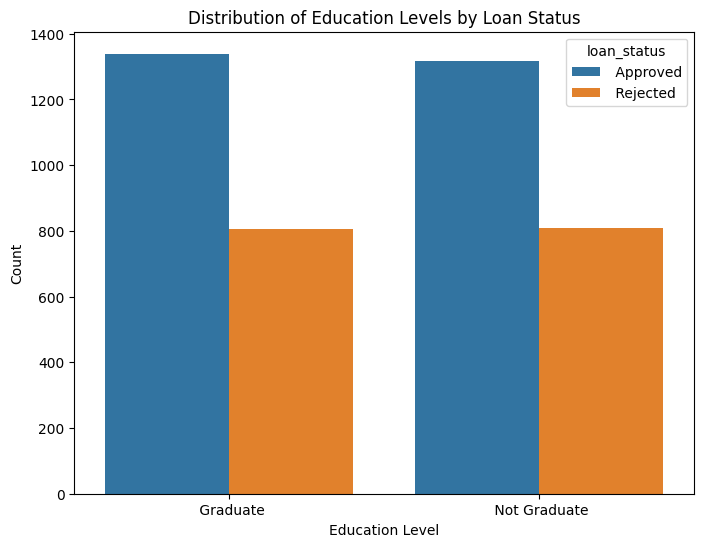

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=df)
plt.title('Distribution of Education Levels by Loan Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

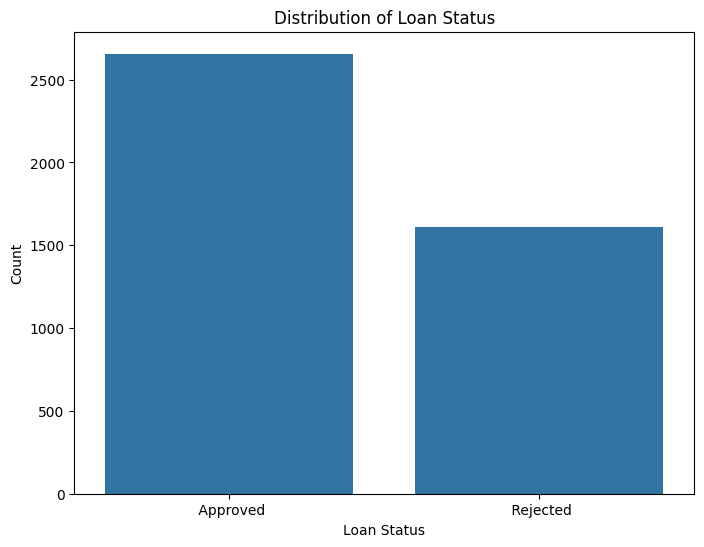

In [ ]:
# Bar Chart of loan Status

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

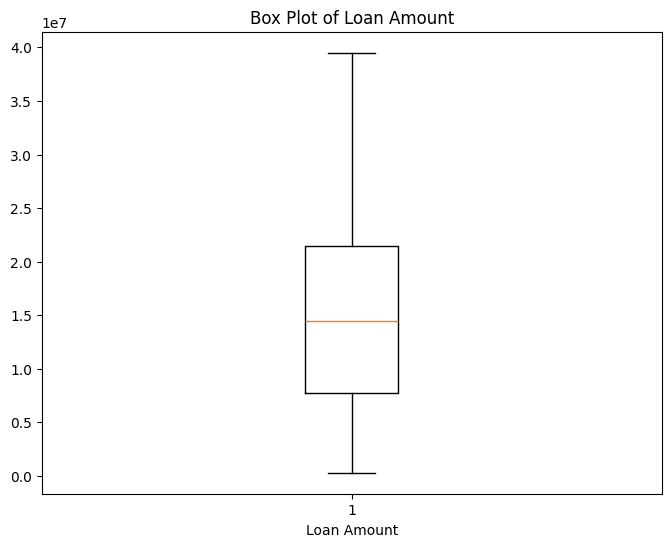

In [ ]:
# Box Plot for loan Amount

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.boxplot(x=df['loan_amount'])
plt.title('Box Plot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

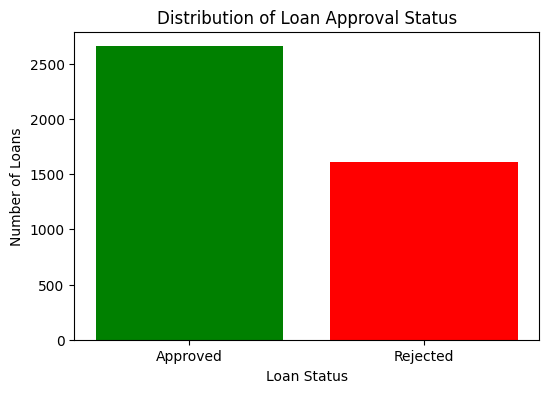

In [ ]:
#which group has higher loan approval

approved_loans = df[df['loan_status'].str.strip() == 'Approved'].shape[0]
rejected_loans = df[df['loan_status'].str.strip() == 'Rejected'].shape[0]

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.bar(['Approved', 'Rejected'], [approved_loans, rejected_loans], color=['green', 'red'])
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.title('Distribution of Loan Approval Status')
plt.show()

In [ ]:
# Show correlations specifically with 'loan_status_numerical'
correlations_with_loan_status = correlation_matrix['loan_status_numerical'].sort_values(ascending=False)
display(correlations_with_loan_status)

,loan_status_numerical
loan_status_numerical,1.000000
cibil_score,0.765554
loan_amount,0.024530
commercial_assets_value,0.013255
self_employed_ Yes,0.004765
education_ Not Graduate,0.003369
bank_asset_value,-0.001077
income_annum,-0.007203
luxury_assets_value,-0.007961
no_of_dependents,-0.012240


/tmp/ipython-input-2902730445.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='loan_status', y='cibil_score', data=df, palette='viridis')


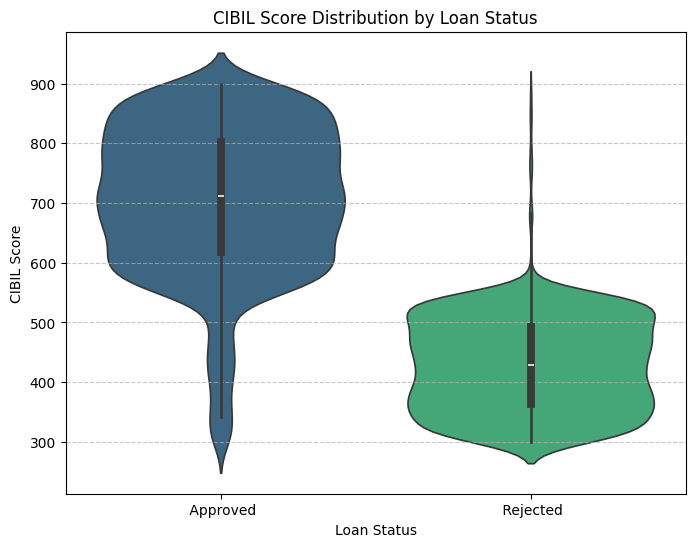

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.violinplot(x='loan_status', y='cibil_score', data=df, palette='viridis')
plt.title('CIBIL Score Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Features (X) head:")
display(x.head())
print("Features (X) shape:")
print(x.shape)

Features (X) head:


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


Features (X) shape:
(4269, 12)


In [ ]:
print("Target (Y) head:")
display(y.head())
print("Target (Y) shape:")
print(y.shape)

Target (Y) head:


,loan_status
0,Approved
1,Rejected
2,Rejected
3,Rejected
4,Rejected


Target (Y) shape:
(4269,)
